# <a id='toc1_'></a>[<center> Red Wine Quality](#toc0_)

**Table of contents**<a id='toc0_'></a>     
  - [Introduction:](#toc1_1_)    
  - [Prerequisite](#toc1_2_)    
  - [Package installing](#toc1_3_)    
  - [Exploratory Data Analysis](#toc1_4_)    
    - [Loading the data and inspecting the dataset](#toc1_4_1_)    
    - [Univarite analysis](#toc1_4_2_)    
    - [Bivariate analysis](#toc1_4_3_)    
  - [Statistical inference](#toc1_5_)    
    - ['Alcohol'](#toc1_5_1_)    
    - ['quality'/'grade'](#toc1_5_2_)    
  - [Training and Fitting Machine Learning Model](#toc1_6_)    
    - ['Alcohol'](#toc1_6_1_)    
    - ['grade'](#toc1_6_2_)    
  - [Google Looker 3 graphs:](#toc1_7_)    
  - [Conclusion and Limitation](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introduction:](#toc0_)
- This project would try to aim for verbal presenting in around 15' to 20'
- It will attempt to fullfil the project requirement as follows:
1. Load the data using Pandas
2. Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
3. Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
4. Apply linear machine learning models to predict the quality column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
5. Apply linear machine learning models to predict the alcohol column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
6. Create a Google Data Studio dashboard with at least three different types of charts.
7. Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
8. Provide suggestions about how your analysis can be improved.
- This dataset named "Red Wine Quality" is from [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
- Due to the requirement mentioned above, the analysis of this project would be centred around 2 features: "quality" and  "alcohol"

## <a id='toc1_2_'></a>[Prerequisite](#toc0_)

At this step of learning with Turing College, machine learning has just been briefly intruduced. Hence, there would be a shallow level of machine learning application in this project. 

## <a id='toc1_3_'></a>[Package installing](#toc0_)

In [1]:
# For PEP8 checking
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # for interactive visulisation
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             r2_score, accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## <a id='toc1_4_'></a>[Exploratory Data Analysis](#toc0_)

### <a id='toc1_4_1_'></a>[Loading the data and inspecting the dataset](#toc0_)

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.shape

(1599, 12)

The dataset has 1598 observations and 12 features

In [6]:
df.info(verbose=True)  # Full length report outcome

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The collumn 'Non-Null Count' lets us know there is no null value or missing value, not need to use isna() method<br>
Only 'quality' feature is descreet by looking at their Dtype

In [7]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows", num_duplicates)

Number of duplicate rows 240


In [8]:
# Take a brief look at duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
22              7.9             0.430         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
1567            7.2             0.695         0.13             2.0      0.076   
1579            6.2             0.560         0.09             1.7      0.053   
1581            6.2             0.560         0.09             1.7      0.053   
1592            6.3             0.510         0.13             2.3      0.076   
1596            6.3             0.510         0.13             2.3      0.076   

      free sulfur dioxide  

Many rows have the same values for all columns, yet, there is not enough evidence to say if they are <br>
duplicated, or just the same values. Without ID column, they could be, or could not be considered duplicate. <br>
In this analysis, I would choose to consider those as duplicates

In [9]:
# Removing duplicate records:
df.drop_duplicates(inplace=True)
print("Check if any duplicate left as those following result:")
print(df.isna().sum())

Check if any duplicate left as those following result:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
# Showing basic descriptive statistical analysis:
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.000000,8.310596,1.736990,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1359.000000,0.529478,0.183031,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1359.000000,0.272333,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residual sugar,1359.000000,2.523400,1.352314,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1359.000000,0.088124,0.049377,0.012000,0.070000,0.079000,0.091000,0.611000
free sulfur dioxide,1359.000000,15.893304,10.447270,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1359.000000,46.825975,33.408946,6.000000,22.000000,38.000000,63.000000,289.000000
density,1359.000000,0.996709,0.001869,0.990070,0.995600,0.996700,0.997820,1.003690
pH,1359.000000,3.309787,0.155036,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1359.000000,0.658705,0.170667,0.330000,0.550000,0.620000,0.730000,2.000000


Wine quality: min is 3, max is 8

### <a id='toc1_4_2_'></a>[Univarite analysis](#toc0_)

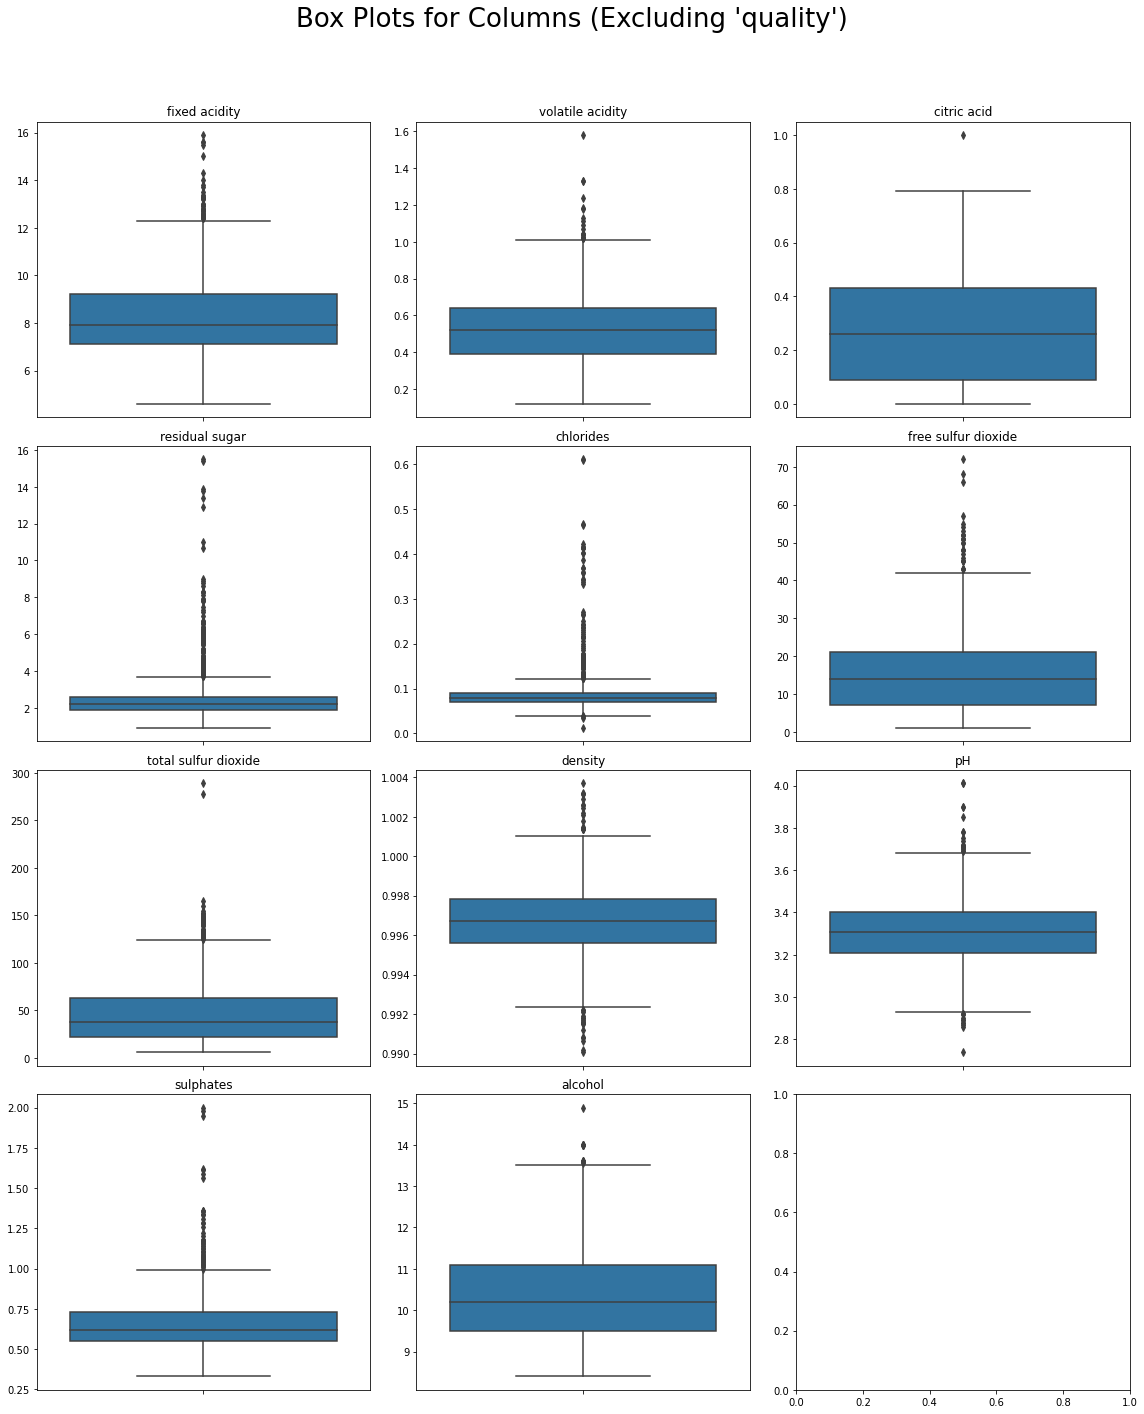

In [11]:
# Visualise all continuous column with boxplot:
# Select columns for box plots (exclude "quality")
df_boxplot = df.drop(columns=['quality'])

# Calculate the number of rows and columns for subplots
num_columns = df_boxplot.shape[1]
num_rows = (num_columns) // 3 + 1

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, num_rows * 5))
fig.suptitle("Box Plots for Columns (Excluding 'quality')",
             fontsize=26)

# Loop through each column and create a box plot in a subplot
for idx, column in enumerate(df_boxplot.columns):
    if idx < num_columns:
        row = idx // 3
        col = idx % 3
        sns.boxplot(data=df_boxplot[column], ax=axes[row, col])
        axes[row, col].set_title(column)
        axes[row, col].set_xticklabels([])
        axes[row, col].set_xlabel('')

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

By looking at their boxplot, except 'fixed acidity' and 'density', the rest have quite clear outliers.<br>
Anyone who's specilised in the field can look at those outliers in deeper manner. However, as one who <br> do not know much about wine's physiochemistry, those outliers would not give me much different information <br> than non-oulier points.

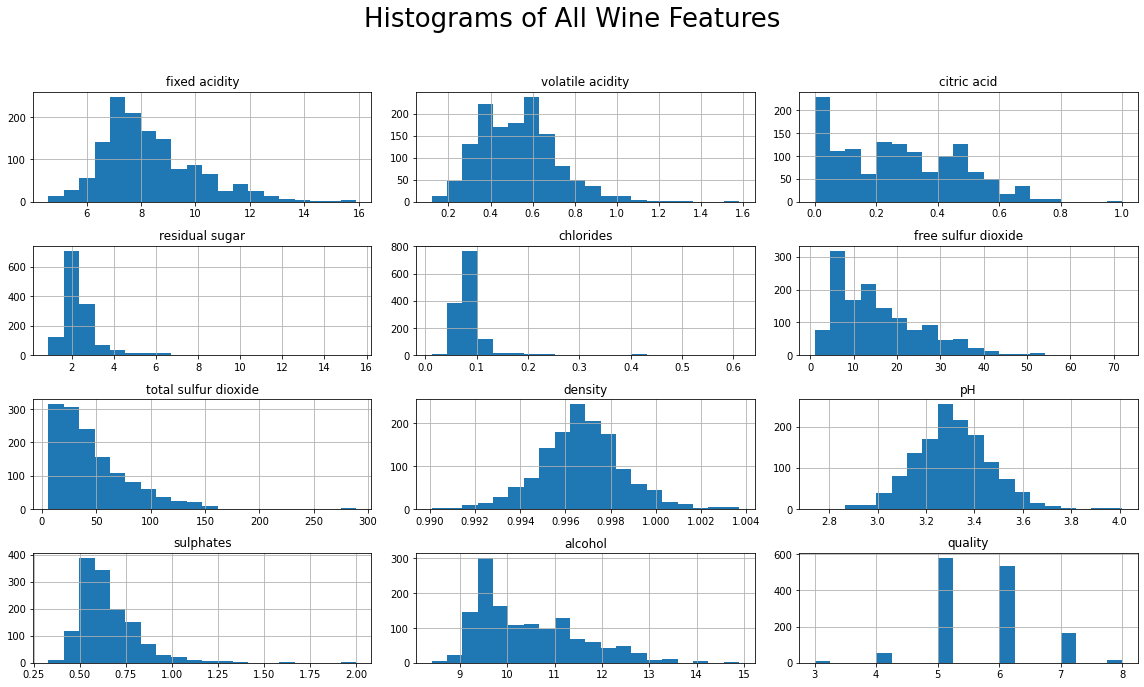

In [12]:
# Create histograms for all columns
df.hist(bins=20, figsize=(16, 10))
plt.suptitle("Histograms of All Wine Features", fontsize=26)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to include supertitle
plt.show()

Most of features with continuous values have their distribution look roughly normal distribution, maybe except 'citri acid' and 'free sulfur dioxide'.<br>
Also, most of them look right-skewed, too, except 'density' and 'pH'

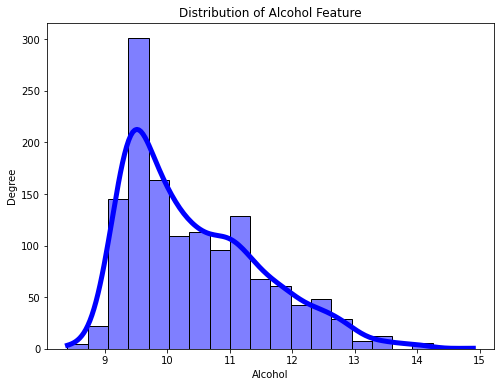

In [13]:
# Show distribution of 'alcohol'
plt.figure(figsize=(8, 6))
sns.histplot(df['alcohol'], bins=20, kde=True, color='blue', edgecolor='black',
             line_kws={'lw': 5})
plt.title("Distribution of Alcohol Feature")
plt.xlabel("Alcohol")
plt.ylabel("Degree")
plt.grid(False)
plt.show()

Again, 'alcohol' dimension is considered normal distribution with being slightly right tailed.

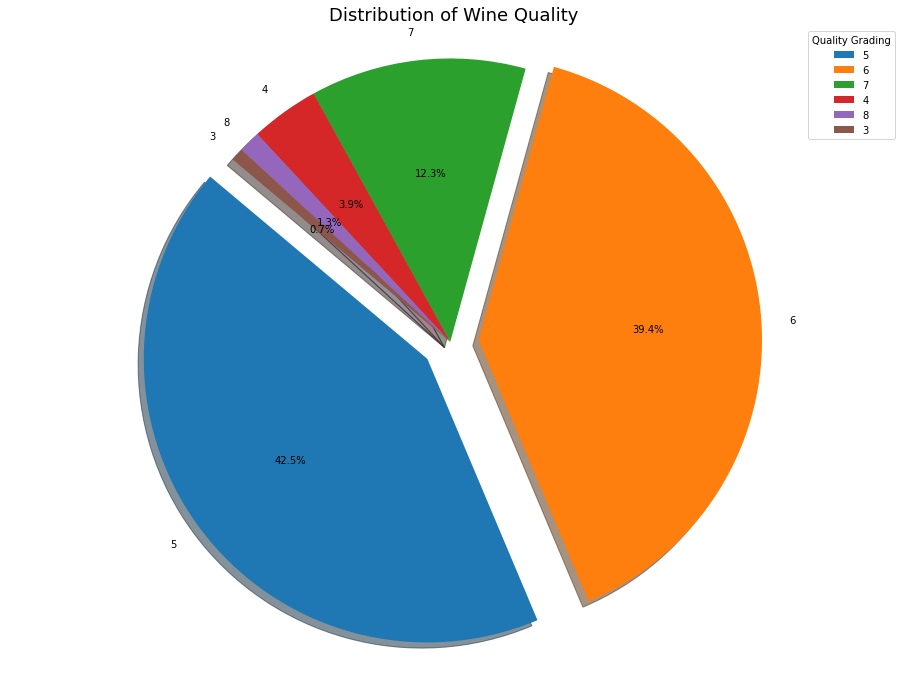

In [14]:
# This visualisation is static graph for Github upload, interactive next cell
# Visualise the propotion of 'quality' feature:
# Count the occurrences of each quality category
quality_counts = df['quality'].value_counts()

# Define explode values to separate crowded slices
explode = (0.1, 0.1, 0, 0, 0, 0)  # Explode the first slice

# Create a pie chart with explode and legend
plt.figure(figsize=(16, 12))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%',
        startangle=140, explode=explode, shadow=True)
plt.title("Distribution of Wine Quality", fontdict={'fontsize': 18})

# Add a legend to provide clear overview
plt.legend(title="Quality Grading", loc="best", labels=quality_counts.index)
plt.axis('equal')
plt.show()

In [15]:
# Interactive pie chart (not be shown on Github version but on JN):
# Count the occurrences of each quality category
quality_counts = df['quality'].value_counts().reset_index()
quality_counts.columns = ['Quality', 'Count']

# Create an interactive pie chart using Plotly Express
fig = px.pie(quality_counts, values='Count', names='Quality',
             title='Distribution of Wine Quality',
             labels={'Quality': 'Quality Category'})
# Customize the legend title
fig.update_layout(legend_title_text='Quality grade')
# Show the interactive chart
fig.show()

Looking at the pie charts, we can easily see there is six quality grade, which is from 3 to 8, and grade 5 is the highest propotion, 45.5% and followed by quality 6 with 39.4%

### <a id='toc1_4_3_'></a>[Bivariate analysis](#toc0_)

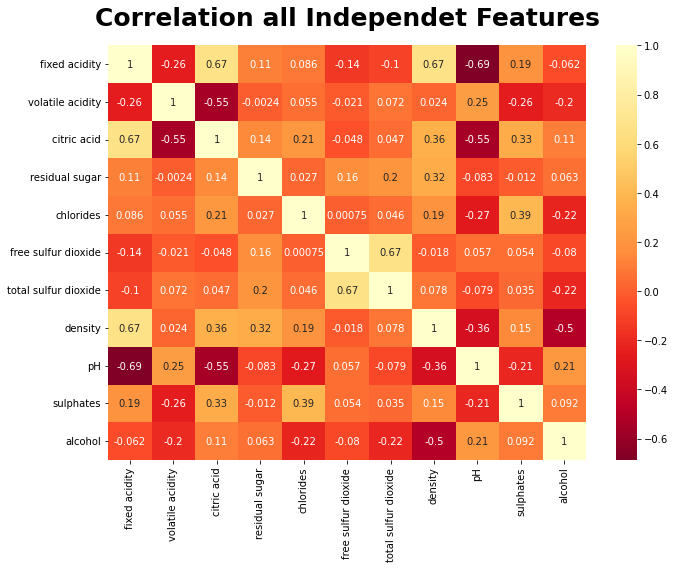

In [16]:
# Correlation between all continuous features:
columns = df.columns.tolist()
columns.remove("quality")  # Quality is having discrete values
corr = df[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt=".2g", annot=True, cmap='YlOrRd_r')
plt.title("Correlation all Independet Features",
          fontweight="black", size=25, pad=20)
plt.tight_layout()
plt.show()

In [17]:
## Need to check negative value, too

1:1: E266 too many leading '#' for block comment


In [18]:
# Filter the correlation table to show values higher than 0.65 and lower than 1
filtered_correlations = corr[(corr > 0.65) & (corr < 1)].fillna(0)
filtered_correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,0.000000,0.0,0.667437,0.0,0.0,0.000000,0.000000,0.670195,0.0,0.0,0.0
volatile acidity,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
citric acid,0.667437,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
residual sugar,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
chlorides,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
free sulfur dioxide,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.667246,0.000000,0.0,0.0,0.0
total sulfur dioxide,0.000000,0.0,0.000000,0.0,0.0,0.667246,0.000000,0.000000,0.0,0.0,0.0
density,0.670195,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
pH,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
sulphates,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


We can see some features have high correlation to others, including:<br>
1. fixed acidity and citric acid (0.67)
2. fixed acidity and density (0.67)
3. free sulfur dioxide and total sulfur dioxide	(0.67) <br>
Those high correlation migh cause multicollinearity, yet, without domain knowlege of wine physiochemistry, it's really tricky to know. We might deprioritise those features while fiting a model later. 


In [19]:
# Between "quality" (discreet value) and each continuous column
# Calculate the Spearman's rank correlation
correlation_results = {}

# Iterate through continuous columns
continuous_columns = df.columns.difference(['quality'])
for col in continuous_columns:
    correlation, _ = stats.spearmanr(df['quality'], df[col])
    correlation_results[col] = correlation

# Print correlation results
for col, correlation in correlation_results.items():
    print(f"Correlation between 'quality' and '{col}': {correlation:.4f}")

Correlation between 'quality' and 'alcohol': 0.4880
Correlation between 'quality' and 'chlorides': -0.2044
Correlation between 'quality' and 'citric acid': 0.2194
Correlation between 'quality' and 'density': -0.1843
Correlation between 'quality' and 'fixed acidity': 0.1117
Correlation between 'quality' and 'free sulfur dioxide': -0.0587
Correlation between 'quality' and 'pH': -0.0427
Correlation between 'quality' and 'residual sugar': 0.0257
Correlation between 'quality' and 'sulphates': 0.3806
Correlation between 'quality' and 'total sulfur dioxide': -0.1966
Correlation between 'quality' and 'volatile acidity': -0.3874


In [20]:
# The highest and lowest correlation value:
print("The highest", max(correlation_results.values()).round(4))
print("The lowest", min(correlation_results.values()).round(4))

The highest 0.488
The lowest -0.3874


Clearly, the correlation result of 'quality' and other features (in pairs) is not high

## <a id='toc1_5_'></a>[Statistical inference](#toc0_)

- The population of this dataset is Red Wine products in the market
- The statistical significance in this project is 5%

This part will look at 2 attributes: 'alcohol' and 'quality'. However, the feature 'quality' will be transformed to 'grade'

### <a id='toc1_5_1_'></a>['Alcohol'](#toc0_)

In [21]:
# Confidence Interval (CI) of 'alcohol'
# As its distribution shown above as normal distribution, and
# the number of obsevation is robust (1598), then we will
# use norm.interval() function:
CI95 = stats.norm.interval(alpha=0.95, loc=np.mean(df['alcohol']),
                           scale=stats.sem(df['alcohol']))
CI99 = stats.norm.interval(alpha=0.99, loc=np.mean(df['alcohol']),
                           scale=stats.sem(df['alcohol']))
print('95% CI of alcohol is', CI95)
print('99% CI of alcohol is', CI99)

95% CI of alcohol is (10.37478575666473, 10.489845099356854)
99% CI of alcohol is (10.356708623780918, 10.507922232240666)


'quality' data are discreet, hence we cannot calculate CI as we did to 'alcohol' above

### <a id='toc1_5_2_'></a>['quality'/'grade'](#toc0_)

In [22]:
# Feature engineer: create a "grade" column, where 'quality' >= 7
# is 1, means 'high grade', the rest is 2, referring to low grade:
df['grade'] = df['quality'].apply(lambda x: 1 if x >= 7 else 2)

# Print the updated DataFrame
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,2
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,2


I want to do statsitical test to see if there is any statistical difference between grade 1 and 2 in alcohol content<br>
To do so, the distributions need to be checked first.

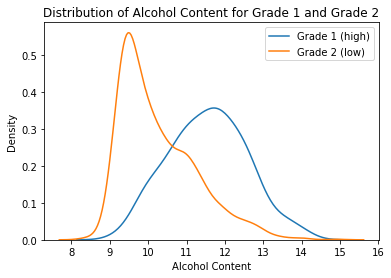

In [23]:
# Check if the distribution of those 2 are normally distribtuted
# Plot the distribution of alcohol content for grade 1 and grade 2
sns.kdeplot(data=df[df['grade'] == 1]['alcohol'], label='Grade 1 (high)')
sns.kdeplot(data=df[df['grade'] == 2]['alcohol'], label='Grade 2 (low)')

# Add labels and title
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.title('Distribution of Alcohol Content for Grade 1 and Grade 2')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [24]:
# The sample sizes need to be checked, too
# Count the occurrences of each grade
grade_counts = df['grade'].value_counts()

# Print the sample sizes
print("Sample size of Grade 1:", grade_counts[2])  # Grade 1 corresponds to 2
print("Sample size of Grade 2:", grade_counts[1])  # Grade 2 corresponds to 1

Sample size of Grade 1: 1175
Sample size of Grade 2: 184


Those two distribution can be considered roughly normally distributed, pluse bit enough sample sizes. We can use t-test to see if they have any statistical difference in their alcohol content. It is a comparision of two populations, one is wine with grade 1, and the other is with grade 2.

In [25]:
# Perform the independent two-sample t-test
grade_1_alcohol = df[df['grade'] == 1]['alcohol']
grade_2_alcohol = df[df['grade'] == 2]['alcohol']

# Perform the test (t-test) and get the p-value
t_statistic, p_value = stats.ttest_ind(grade_1_alcohol, grade_2_alcohol)

# Print the results
print("Test result:")
print("Test Statistic:", t_statistic)
print("p-value:", p_value)

# Determine if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference at α being 5%.")
else:
    print("There is no statistically significant difference at α being 5%")

Test result:
Test Statistic: 16.555555042278684
p-value: 3.2441514679446344e-56
There is a statistically significant difference at α being 5%.


## <a id='toc1_6_'></a>[Training and Fitting Machine Learning Model](#toc0_)

### <a id='toc1_6_1_'></a>['Alcohol'](#toc0_)

In [26]:
# Features (X) without the 'grade' column and target variable (y)
X = df.drop(columns=['alcohol', 'grade'])  # Exclude 'alcohol', 'grade'
y = df['alcohol']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiate and train the model (linear regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.34970404844766895
Root Mean Squared Error: 0.5913578006990936
Mean Absolute Error: 0.4615999975224106
R-squared: 0.6791784648730568


Mean Squared Error (MSE): The MSE value of approximately 0.35 indicates that, on average, the squared difference between the model's predicted alcohol content values and the actual values is around 0.35. Lower MSE values are better, and this value suggests that your model's predictions are generally close to the actual values.

Root Mean Squared Error (RMSE): The RMSE value of approximately 0.59 is the square root of the MSE. It's in the same units as the target variable (alcohol content). The RMSE represents the average absolute difference between the model's predicted values and the actual values. Lower RMSE values indicate better model performance.

Mean Absolute Error (MAE): The MAE value of approximately 0.46 indicates that, on average, the absolute difference between the model's predicted alcohol content values and the actual values is around 0.46. Like the RMSE, lower MAE values are better.

R-squared (R2): The R-squared value of approximately 0.68 suggests that about 68% of the variability in alcohol content is explained by the features used in the model. In other words, the model is capturing a significant portion of the underlying patterns in the data. However, there's still room for improvement, as R-squared values closer to 1 indicate better model fit. Yet, it needs to find out the balance to avoid overfitting.

Personally, without much of domain knowledge, the mordel seems to perform resonably well.

In [27]:
# Access coefficients of each feature
coefficients = model.coef_

# Map coefficients to feature names
feature_coefficients = dict(zip(X.columns, coefficients))

# Print coefficients of each feature
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient:.4f}")

fixed acidity: 0.5158
volatile acidity: 0.5275
citric acid: 0.8076
residual sugar: 0.2624
chlorides: -0.6024
free sulfur dioxide: -0.0023
total sulfur dioxide: -0.0019
density: -584.8609
pH: 3.7643
sulphates: 0.9255
quality: 0.2456


The density variable has the highest influence to predict alcohol content, but in the negative way. However, without normalisation, it might have caused by different scale, rather than the magnitude of the coefficients

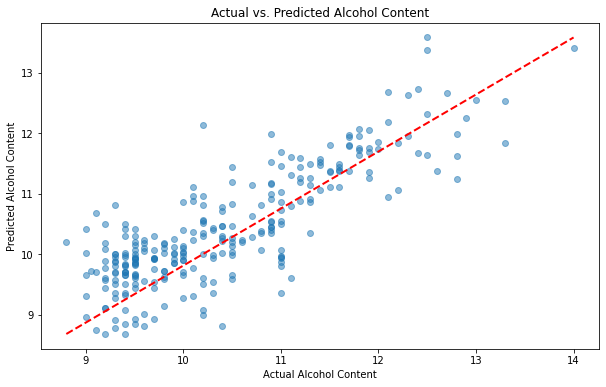

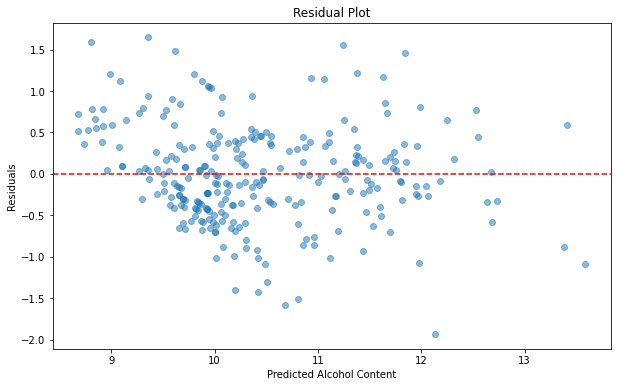

In [28]:
# Visualise the fitting of the model
# Scatter plot of actual vs. predicted alcohol content
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)],
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Alcohol Content")
plt.ylabel("Predicted Alcohol Content")
plt.title("Actual vs. Predicted Alcohol Content")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Alcohol Content")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### <a id='toc1_6_2_'></a>['grade'](#toc0_)

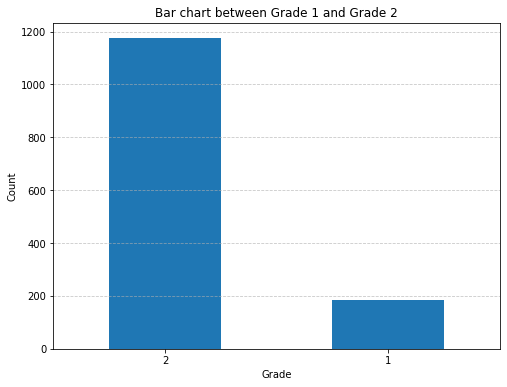

In [45]:
value_counts = df['grade'].value_counts()
ax = value_counts.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels:
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Bar chart between Grade 1 and Grade 2')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The sample of Grade 1 Wine is about 1/6 of the counterpart. It would highly likely lead to bias when training models. However in this stage of studying, we won't do anything about it.

In [30]:
# Features (X) and target variable (y)
X = df.drop(columns=['quality', 'grade'])
y = df['grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiate and train the logistic regression model with a different solver
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8897058823529411

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.21      0.32        34
           2       0.90      0.99      0.94       238

    accuracy                           0.89       272
   macro avg       0.80      0.60      0.63       272
weighted avg       0.87      0.89      0.86       272


Confusion Matrix:
 [[  7  27]
 [  3 235]]


Accuracy: The accuracy of approximately 0.89 (or 89%) indicates that the model correctly predicted the grade for 89% of the samples in the test set.

Classification Report: The classification report provides additional insights into the model's performance for each class (1 and 2), including precision, recall, and F1-score. Here's a breakdown:

For class 1 (low grade), the model's precision is 0.70, recall is 0.21, and F1-score is 0.32.
For class 2 (high grade), the model's precision is 0.90, recall is 0.99, and F1-score is 0.94.<br>

Confusion Matrix: The confusion matrix shows how many samples were correctly and incorrectly classified for each class. For example, the model correctly predicted 7 samples as class 1 and 235 samples as class 2. However, it incorrectly predicted 27 samples as class 1 and 3 samples as class 2.

Macro and Weighted Averages: The macro average of precision, recall, and F1-score is calculated by averaging the values for each class equally. The weighted average takes into account class imbalance by weighting each class's average by its support (number of samples).

Overall, the model seems to perform well in predicting class 2 (low grade), as indicated by high precision, recall, and F1-score. However, its performance for class 1 (high grade) is lower, suggesting room for improvement, especially in terms of recall. Let's try different algorithm: decision tree.

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiate and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8823529411764706

Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.56      0.54        34
           2       0.94      0.93      0.93       238

    accuracy                           0.88       272
   macro avg       0.73      0.74      0.74       272
weighted avg       0.89      0.88      0.88       272


Confusion Matrix:
 [[ 19  15]
 [ 17 221]]


A comparison of their performances:

Logistic Regression:

- Accuracy: 0.8897
- F1-score (low grade): 0.32
- F1-score (high grade): 0.94 <br>

Decision Tree:

- Accuracy: 0.8824
- F1-score (low grade): 0.54
- F1-score (high grade): 0.93 <br>
Looking at these results, both models are achieving relatively high accuracy, and the F1-scores for both classes are reasonable. However, both are not good at predicting Grade 1 Wine. Decision tree is better at it, yet, slightly worse in predicting Grade 2 Wine. Personally I would choose Decisition Tree as the difference in Wine Grade 2 prediction is insignificant.

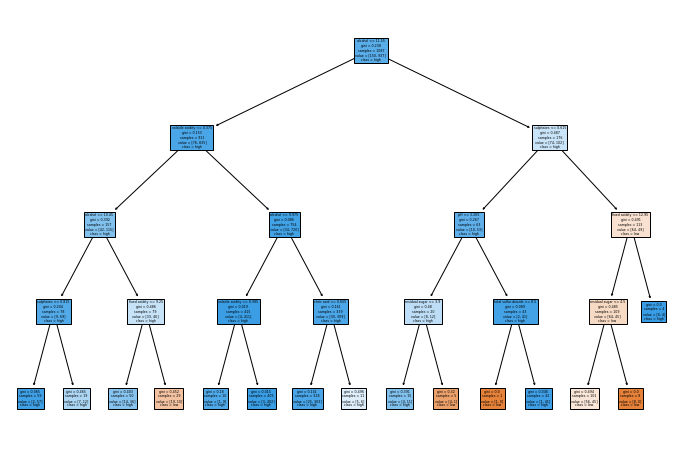

In [32]:
# Instantiate and train the Decision Tree model with a limited depth
max_depth = 4  # Choose a suitable depth value
decision_tree_model = DecisionTreeClassifier(random_state=42,
                                             max_depth=max_depth)
decision_tree_model.fit(X_train, y_train)

# Visualize the limited depth Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=X_train.columns,
          class_names=['low', 'high'], filled=True)
plt.show()

The dataset are big, so even with max depth of 4 levels, the visulisation of the tree is still not that insightful.

## <a id='toc1_7_'></a>[Google Looker 3 graphs:](#toc0_)

[3 charts](https://lookerstudio.google.com/reporting/ee7f6b95-1f55-4af8-a35c-09070eb999d3)

## <a id='toc1_8_'></a>[Conclusion and Limitation](#toc0_)

- Most of features with continuous values have their distribution look roughly normal distribution, maybe except 'citri acid' and 'free sulfur dioxide'.<br>
Also, most of them look right-skewed, too, except 'density' and 'pH'
- There are some high correlation between features, which migh cause multicollinearity
- Linear Machine Learning model for 'Alcohol' performs decently well
- For 'grade' feature, which is a transformation of 'quality', Decision tree and Logistics Regression both have high accuracy, yet not good at predicting Grade 1 Wine. The former is slightly better than the latter
- Fulfill 8 requirements from Turing College mentioned in Introduction part.
- Limitation: the machine learning part is quite brief due to not yet in the part of studying materials about tunning or such. We also ignored the bias coursed by heavily imbalance of proportion between Grade 1's and Grade 2' samples.